In [ ]:
!pip install textblob

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report, confusion_matrix, ConfusionMatrixDisplay
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df = pd.read_csv("./datasets/movie_review_polarity.csv")

df

,review,sentiment,word_count,Cleaned Review
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...
...,...,...,...,...
49577,I thought this movie did a down right good job...,positive,194,thought movie right good job wasnt creative or...
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,bad plot bad dialogue bad acting idiotic direc...
49579,I am a Catholic taught in parochial elementary...,negative,230,catholic taught parochial elementary schools n...
49580,I'm going to have to disagree with the previou...,negative,212,im going disagree previous comment side maltin...


In [ ]:
df["TextBlob_Subjectivity"] = df["Cleaned Review"].apply(getSubjectivity)

df.sample(10)

,review,sentiment,word_count,Cleaned Review,TextBlob_Subjectivity
26037,"Gritty, dusty western from director Richard Br...",negative,117,gritty dusty western director richard brooks s...,0.501515
47001,This movie is really special. It's a very beau...,positive,352,movie really special beautiful movie starts th...,0.615116
23029,Perhaps Disney was hoping for another Mary Pop...,positive,273,perhaps disney hoping another mary poppins dif...,0.706532
9647,A group of young adults open a plain of escape...,negative,192,group young adults open plain escape spirit el...,0.484837
44406,This movie has a special way of telling the st...,positive,115,movie special way telling story first found ra...,0.522279
37427,"Long on action and stunt work, but so short on...",negative,39,long action stunt work short character delinea...,0.386667
28028,"Whenever I see a video like this, I have to as...",negative,216,whenever see video like ask financed hbo showt...,0.515280
37817,This is one of the best Bollywood movies i hav...,positive,130,one best bollywood movies seen family friends ...,0.548701
30221,"Even though we know how the story ends, this i...",positive,710,even though know story ends gripping flyonthew...,0.535417
7966,"as with many of Wong's films, a lot of people ...",positive,69,many wongs films lot people find boring confus...,0.483333


In [ ]:
df["TextBlob_Polarity"] = df["Cleaned Review"].apply(getPolarity)

df.sample(10)

,review,sentiment,word_count,Cleaned Review,TextBlob_Subjectivity,TextBlob_Polarity
45889,A not so good action thriller because it unsuc...,negative,141,good action thriller unsuccessfully trends wat...,0.482917,0.198333
46813,An old vaudeville team of Willy Clark (Walter ...,positive,241,old vaudeville team willy clark walter matthau...,0.477545,0.245772
47602,"Man, I think people have forgotten how to watc...",positive,150,man think people forgotten watch movie everyon...,0.665152,-0.274242
16177,"This movie was, in one word, terrible. It was ...",negative,67,movie one word terrible boring predictable dow...,0.554545,-0.368182
37285,"Still haven't read a single Dan Brown book, bu...",positive,184,still havent read single dan brown book watche...,0.448780,0.134838
47306,What an ambitious project Kenneth Branagh unde...,positive,644,ambitious project kenneth branagh undertook we...,0.539229,0.202381
31896,I was very disappointed by this movie. Ms Engl...,negative,240,disappointed movie ms english says fan origina...,0.637654,-0.018519
23289,I had a bit of hope for this hour long film ma...,negative,234,bit hope hour long film made footage old pover...,0.415626,0.104061
37270,"Maybe it's just that it was made in 1997, or m...",negative,128,maybe made maybe whoever managed get soft spot...,0.435556,0.098333
3745,This was such a beautiful film. Such an amazin...,positive,137,beautiful film amazing performance joseph brad...,0.695370,0.206481


In [ ]:
def getAnalysis(score):
     if score <= 0:
        return "negative"
     else:
        return "positive"

In [ ]:
df["predicted_sentiment"] = df["TextBlob_Polarity"].apply(getAnalysis)

df.sample(10)

,review,sentiment,word_count,Cleaned Review,TextBlob_Subjectivity,TextBlob_Polarity,predicted_sentiment
23611,PLEASE TAKE A MINUTE TO READ MY ENTIRE REVIEW....,negative,430,please take minute read entire review knocking...,0.467497,0.007848,positive
21066,I had seen 'Kalifornia' before (must be about ...,positive,462,seen kalifornia must years ago still remember ...,0.491100,0.195351,positive
19376,I saw a lot films about Charles Dickens' Chris...,positive,51,saw lot films charles dickens christmas carol ...,0.575000,0.387500,positive
36515,Here is one the entire family will enjoy... ev...,positive,154,one entire family enjoy even consider old fair...,0.529196,0.308566,positive
5596,I saw this movie on the shelf at Blockbuster a...,negative,775,saw movie shelf blockbuster thought looked coo...,0.570388,0.047101,positive
48803,"Wow, I loved this film. It may not have had th...",positive,112,wow loved film may funding advertising latest ...,0.675926,0.385185,positive
10276,"Colleges, High Schools, Fraternities and Soror...",negative,868,colleges high schools fraternities sororities ...,0.519323,0.009317,positive
38038,He only gets third billing (behind Arthur Trea...,negative,119,gets third billing behind arthur treacher virg...,0.518452,-0.083117,negative
32737,Hellraiser: Bloodline is where the sequel medi...,negative,214,hellraiser bloodline sequel mediocrity hellrai...,0.420113,-0.138910,negative
46926,(the description of the mood of the movie may ...,positive,407,description mood movie may considered spoiler ...,0.520193,0.003166,positive


In [ ]:
accuracy = accuracy_score(df["sentiment"], df["predicted_sentiment"])

f1 = f1_score(df["sentiment"], df["predicted_sentiment"],average = None)

precision = precision_score(df["sentiment"], df["predicted_sentiment"], average = None)

recall = recall_score(df["sentiment"], df["predicted_sentiment"], average = None)

In [ ]:
class_names = ["negative", "positive"]

print(f"Accuracy: {accuracy:.2f}")

for class_label, prec, rec, f1 in zip(class_names, precision, recall,f1):
    print(f"Class {class_label}:")
    print(f"   Precision: {prec:.2f}")
    print(f"   Recall: {rec:.2f}")
    print(f"   F1 score: {f1:.2f}")

Accuracy: 0.70
Class negative:
   Precision: 0.87
   Recall: 0.47
   F1 score: 0.61
Class positive:
   Precision: 0.64
   Recall: 0.93
   F1 score: 0.76


In [ ]:
report = classification_report(df["sentiment"], df["predicted_sentiment"])

print(report)

              precision    recall  f1-score   support

    negative       0.87      0.47      0.61     24698
    positive       0.64      0.93      0.76     24884

    accuracy                           0.70     49582
   macro avg       0.76      0.70      0.68     49582
weighted avg       0.76      0.70      0.68     49582



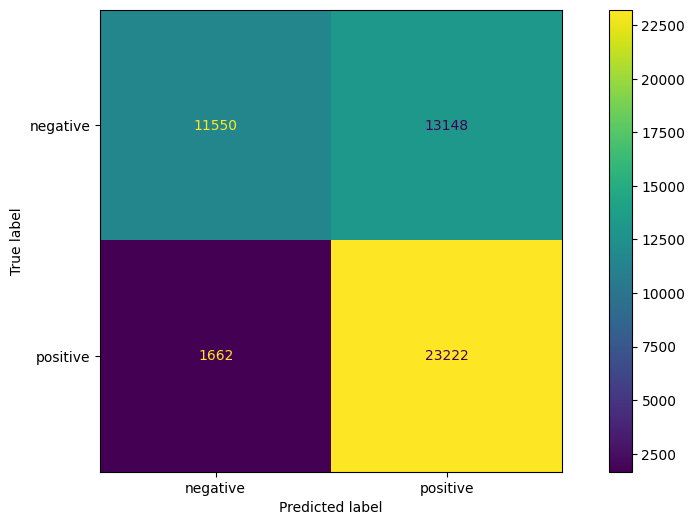

In [ ]:
cm = confusion_matrix(df["sentiment"], df["predicted_sentiment"])
cmp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])

fig, ax = plt.subplots(figsize=(12, 6))

cmp.plot(ax=ax)